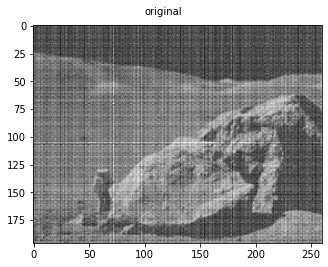

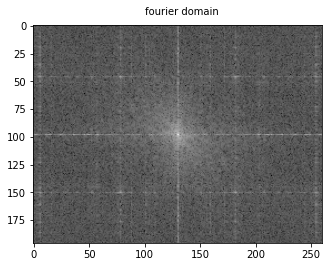

In [1]:
import cv2
import numpy as np
from scipy.fft import fft2, fftshift, ifft2, ifftshift
import matplotlib.pyplot as plt

# Load the image
img = cv2.imread('land.png')

# Convert to grayscale
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

# Perform 2D Fourier Transform
f = fft2(gray)

# Shift zero-frequency component to center
fshift = fftshift(f)
abs_ff = abs(fshift)
phase = np.angle(fshift)


# Compute magnitude spectrum
magnitude_spectrum = 20*np.log(1+np.abs(fshift))

# Display the Fourier domain image
plt.figure()
plt.imshow(gray , cmap='gray')
plt.text(100, -10, 'original')
plt.show()
plt.figure()
plt.imshow(magnitude_spectrum , cmap='gray')
plt.text(100, -10, 'fourier domain')
plt.show()


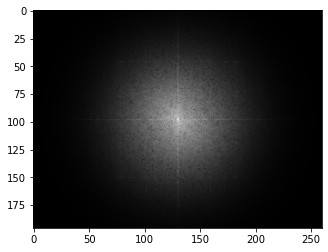

In [15]:

# Create a Gaussian filter
rows, cols = gray.shape
crow, ccol = rows // 2, cols // 2
sigma = 40
gaussian = np.zeros((rows, cols))
for i in range(rows):
    for j in range(cols):
        gaussian[i, j] = np.exp(-((i-crow)**2 + (j-ccol)**2) / (2*sigma**2))

# Apply the filter in the Fourier domain
filtered_spectrum = fshift * gaussian
# filtered_spectrum = filtered_spectrum * np.exp(1j * phase)

# Apply the filter to the normalized magnitude spectrum usng the mask
show_spectrum = magnitude_spectrum * gaussian


# Apply the filter to the normalized magnitude spectrum
# show_spectrum = magnitude_spectrum * gaussian_mask

show_spectrum = show_spectrum * np.exp(1j*phase)
show_spectrum = abs(show_spectrum)
# Display the filtered Fourier domain image
plt.figure()
plt.imshow(show_spectrum , cmap='gray')
plt.show()


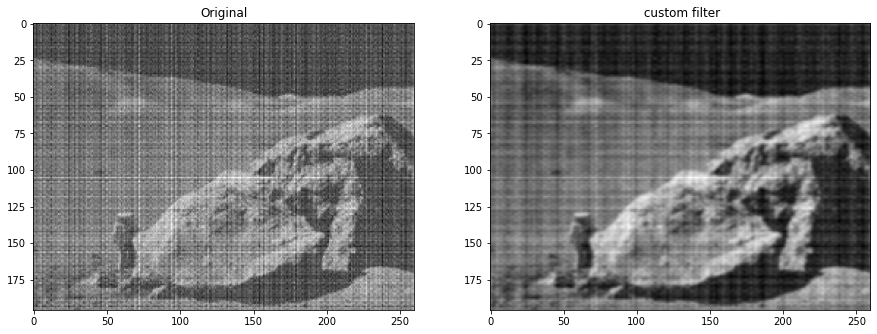

In [16]:

# Apply inverse shift to move zero-frequency component back to top-left corner
f_ishift = ifftshift(filtered_spectrum)

# Apply inverse 2D Fourier Transform
img_back = ifft2(f_ishift)

# Take the absolute value to get rid of any complex numbers
img_back = np.abs(img_back)

# Normalize pixel values between 0 and 255
img_back = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX)

# Convert to 8-bit integer
img_back = img_back.astype('uint8')

# Display the reconstructed image
fig, axs = plt.subplots(1, 2, figsize=(15, 10))

axs[0].imshow(gray, cmap='gray')
axs[0].set_title('Original')

axs[1].imshow(img_back, cmap='gray')
axs[1].set_title(' custom filter')
plt.show()

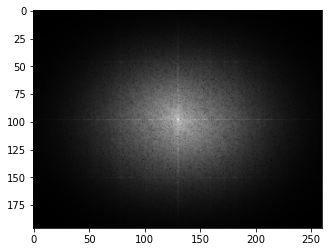

In [59]:
# Define the custom filter kernel 
kernel_size = 50
kernel_center = int(kernel_size/2)
x, y = np.meshgrid(np.arange(kernel_size), np.arange(kernel_size))
x -= kernel_center
y -= kernel_center
freq_radius = 10
kernel = np.exp(-(x**2 + y**2)/(2*(freq_radius**2)))
kernel /= np.sum(kernel)

# Resize the kernel to match the shape of the Fourier transformed image after the shift
resized_kernel = cv2.resize(kernel, fshift.shape[::-1])

# Apply the custom filter to the Fourier domain image
filtered_spectrum = fshift * resized_kernel
# filtered_spectrum = filtered_spectrum * np.exp(1j * phase)




# Apply the filter to the normalized magnitude spectrum usng the mask
show_spectrum = magnitude_spectrum * resized_kernel


# Apply the filter to the normalized magnitude spectrum
# show_spectrum = magnitude_spectrum * gaussian_mask

show_spectrum = show_spectrum * np.exp(1j*phase)
show_spectrum = abs(show_spectrum)
# Display the filtered Fourier domain image
plt.figure()
plt.imshow(show_spectrum , cmap='gray')
plt.show()


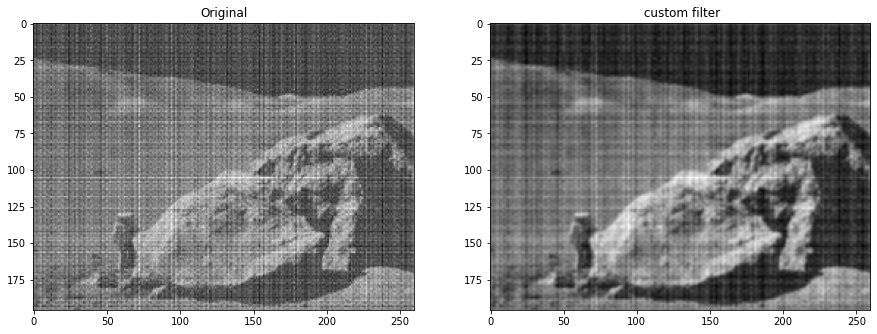

In [60]:

# Apply inverse shift to move zero-frequency component back to top-left corner
f_ishift = ifftshift(filtered_spectrum)

# Apply inverse 2D Fourier Transform
img_back = ifft2(f_ishift)

# Take the absolute value to get rid of any complex numbers
img_back = np.abs(img_back)

# Normalize pixel values between 0 and 255
img_back = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX)

# Convert to 8-bit integer
img_back = img_back.astype('uint8')

# Display the reconstructed image
fig, axs = plt.subplots(1, 2, figsize=(15, 10))

axs[0].imshow(gray, cmap='gray')
axs[0].set_title('Original')

axs[1].imshow(img_back, cmap='gray')
axs[1].set_title(' custom filter')
plt.show()

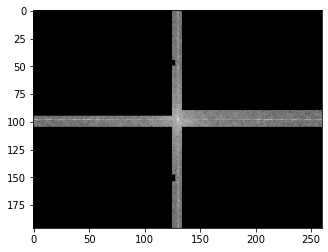

In [61]:
# Create a mask to remove the bands filter 
mask = np.ones_like(fshift)

# mask[45:50,0:128] = 0
# mask[45:50,134:] = 0

# mask[148:154,0:128] = 0
# mask[148:154,134:] = 0


# mask[:95,177:185] = 0
# mask[105:,177:185] = 0

# mask[:95,0:85] = 0
# mask[105:,0:85] = 0





mask[45:50,0:128] = 0
mask[45:50,134:] = 0

mask[148:154,0:128] = 0
mask[148:154,134:] = 0


mask[:90,134:] = 0
mask[105:,134:] = 0

mask[:95,0:125] = 0
mask[105:,0:125] = 0

# mask[:, 100:160] = 0

# Apply the mask to the Fourier spectrum
filtered_spectrum = fshift * mask

# filtered_spectrum = filtered_spectrum * np.exp(1j * phase)

# Apply the filter to the normalized magnitude spectrum usng the mask
show_spectrum = magnitude_spectrum * mask


# Apply the filter to the normalized magnitude spectrum

show_spectrum = show_spectrum * np.exp(1j*phase)
show_spectrum = abs(show_spectrum)
# Display the filtered Fourier domain image
plt.figure()
plt.imshow(show_spectrum , cmap='gray')
plt.show()

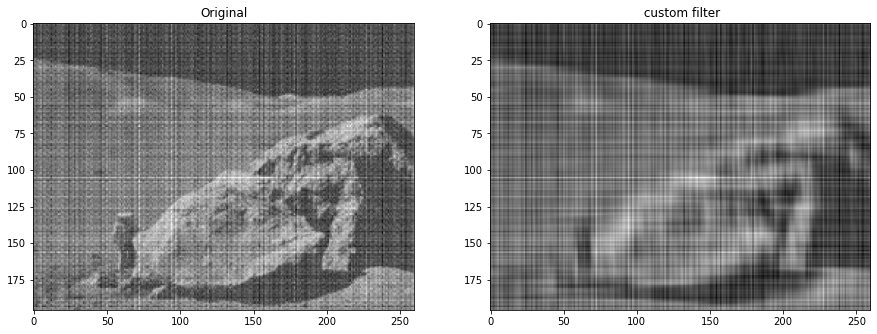

In [62]:

# Apply inverse shift to move zero-frequency component back to top-left corner
f_ishift = ifftshift(filtered_spectrum)

# Apply inverse 2D Fourier Transform
img_back = ifft2(f_ishift)

# Take the absolute value to get rid of any complex numbers
img_back = np.abs(img_back)

# Normalize pixel values between 0 and 255
img_back = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX)

# Convert to 8-bit integer
img_back = img_back.astype('uint8')

# Display the reconstructed image
fig, axs = plt.subplots(1, 2, figsize=(15, 10))

axs[0].imshow(gray, cmap='gray')
axs[0].set_title('Original')

axs[1].imshow(img_back, cmap='gray')
axs[1].set_title(' custom filter')
plt.show()

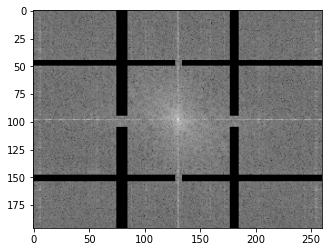

In [63]:
# Create a mask to remove the bands
mask = np.ones_like(fshift)

mask[45:50,0:128] = 0
mask[45:50,134:] = 0

mask[148:154,0:128] = 0
mask[148:154,134:] = 0


mask[:95,177:185] = 0
mask[105:,177:185] = 0

mask[:95,75:85] = 0
mask[105:,75:85] = 0

# mask[:, 100:160] = 0

# Apply the mask to the Fourier spectrum
filtered_spectrum = fshift * mask

# filtered_spectrum = filtered_spectrum * np.exp(1j * phase)

# Apply the filter to the normalized magnitude spectrum usng the mask
show_spectrum = magnitude_spectrum * mask


# Apply the filter to the normalized magnitude spectrum

show_spectrum = show_spectrum * np.exp(1j*phase)
show_spectrum = abs(show_spectrum)
# Display the filtered Fourier domain image
plt.figure()
plt.imshow(show_spectrum , cmap='gray')
plt.show()

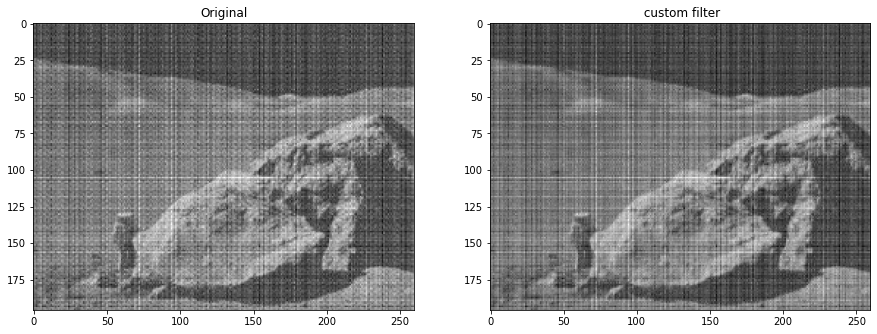

In [65]:

# Apply inverse shift to move zero-frequency component back to top-left corner
f_ishift = ifftshift(filtered_spectrum)

# Apply inverse 2D Fourier Transform
img_back = ifft2(f_ishift)

# Take the absolute value to get rid of any complex numbers
img_back = np.abs(img_back)

# Normalize pixel values between 0 and 255
img_back = cv2.normalize(img_back, None, 0, 255, cv2.NORM_MINMAX)

# Convert to 8-bit integer
img_back = img_back.astype('uint8')

# Display the reconstructed image
fig, axs = plt.subplots(1, 2, figsize=(15, 10))

axs[0].imshow(gray, cmap='gray')
axs[0].set_title('Original')

axs[1].imshow(img_back, cmap='gray')
axs[1].set_title(' custom filter')
plt.show()